# Unsupervised Clustering on a heart failure dataset: a python implementation of principal component analysis for Dr. Qiu

### Sina Dabiri
### sdabiri@emory.edu

#### Version 1.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
The heart dataset's CSV has been put in the project folder. The source of this dataset is: 

Dataset from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure 
                                             from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)
""" 
heart_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# checking for missing values.
heart_df.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# looking for missing data and general stats
heart_df.info()
heart_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Divide the dataset into it's features and it's true label, X and Y.

In [5]:
# Setting the X feature and inspecting it
X = heart_df[['age', 'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']]
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [6]:
# Setting the true label Y vector
Y =  heart_df['DEATH_EVENT']
Y


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [7]:
X.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [8]:
# Principal Component Analysis (PCA): dimentionally reducing the data to two principal components that discribe most of the variation. Fitting the X dataframe using PCA.
# 1- Standardize: z= (value-mean)/stdandard deviation
X_std = (X-X.mean())/X.std()
X_std

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.190949,0.000165,-1.527998,1.678834e-02,0.489237,-1.501519
1,-0.490457,7.502063,-0.007065,7.523047e-09,-0.284076,-0.141739
2,0.350246,-0.449186,-1.527998,-1.036336e+00,-0.090748,-1.728149
3,-0.910808,-0.485257,-1.527998,-5.455595e-01,0.489237,0.084892
4,0.350246,-0.434757,-1.527998,6.507077e-01,1.262550,-4.674340
...,...,...,...,...,...,...
294,0.098035,-0.536789,-0.007065,-1.107907e+00,-0.284076,1.444672
295,-0.490457,1.276075,-0.007065,6.791087e-02,-0.187412,0.538152
296,-1.331160,1.523425,1.851853,4.893878e+00,-0.574068,0.311522
297,-1.331160,1.887234,-0.007065,-1.261275e+00,0.005916,0.764782


In [9]:
# 2- Calculate Covariance Matrix to identify correlations
X_cov = X_std.cov()
X_cov

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000


In [10]:
# 3a - Compute eigenvector and eigenvalues to identify the principal components
X_cov_eigVal, X_cov_eigVec = np.linalg.eig(X_cov)
print("The eig values are: ", X_cov_eigVal)
print("The eig vector is: ", X_cov_eigVec)

The eig values are:  [1.34527211 1.15364884 0.72934891 0.82384075 0.96051258 0.98737681]
The eig vector is:  [[ 0.37378302 -0.54112916 -0.18085313 -0.68105796 -0.25693875  0.0700012 ]
 [-0.20003939  0.37714412 -0.23800393 -0.04940716 -0.62019152  0.61157347]
 [-0.2894085  -0.66521196 -0.41537521  0.53078794 -0.11191279  0.08330005]
 [-0.30235872 -0.12261369  0.02737793 -0.25799978  0.65475011  0.63050293]
 [ 0.54864476 -0.19438773  0.54333596  0.39105499 -0.08800989  0.45312098]
 [-0.58658448 -0.26384445  0.66494074 -0.18026441 -0.31682336 -0.10623682]]


In [11]:
# 3b -sort the eigenvalues and vectors based on size in descending order
X_variance = X_cov_eigVal/ X_cov_eigVal.sum()
index = np.argsort(X_variance)[::-1]
X_var_sor = X_variance[index]
X_cov_eigVec_sor = X_cov_eigVec[:,index]
print(X_var_sor)
print(X_cov_eigVec_sor)

[0.22421202 0.19227481 0.1645628  0.16008543 0.13730679 0.12155815]
[[ 0.37378302 -0.54112916  0.0700012  -0.25693875 -0.68105796 -0.18085313]
 [-0.20003939  0.37714412  0.61157347 -0.62019152 -0.04940716 -0.23800393]
 [-0.2894085  -0.66521196  0.08330005 -0.11191279  0.53078794 -0.41537521]
 [-0.30235872 -0.12261369  0.63050293  0.65475011 -0.25799978  0.02737793]
 [ 0.54864476 -0.19438773  0.45312098 -0.08800989  0.39105499  0.54333596]
 [-0.58658448 -0.26384445 -0.10623682 -0.31682336 -0.18026441  0.66494074]]


In [12]:
# 4 - Printing out the eigenvalues that explain 95% of the variances.
var_sum = 0
idx = []
for i in range(0, len(X_var_sor)):
    var_sum += X_var_sor[i]
    if var_sum < 0.95: 
        idx.append(i)
        exit
X_var_sor_95 = X_var_sor[idx]
X_cov_eigVec_sor_95 = X_cov_eigVec_sor[:, idx]
print("The eigen values that describe the 95% of variance are: \n", X_var_sor_95)
print("The eigen vectors that explain the 95% of variance are: \n", X_cov_eigVec_sor_95)

The eigen values that describe the 95% of variance are: 
 [0.22421202 0.19227481 0.1645628  0.16008543 0.13730679]
The eigen vectors that explain the 95% of variance are: 
 [[ 0.37378302 -0.54112916  0.0700012  -0.25693875 -0.68105796]
 [-0.20003939  0.37714412  0.61157347 -0.62019152 -0.04940716]
 [-0.2894085  -0.66521196  0.08330005 -0.11191279  0.53078794]
 [-0.30235872 -0.12261369  0.63050293  0.65475011 -0.25799978]
 [ 0.54864476 -0.19438773  0.45312098 -0.08800989  0.39105499]
 [-0.58658448 -0.26384445 -0.10623682 -0.31682336 -0.18026441]]


In [13]:
# 5 -  Transforming the X dataframe to the coordinate of the two principal components (PC1, PC2).
#  Reduced dataset = [transpose(X_cov_eigVec_sor_95)]*[transpose(Standardized orignial dataset)]
X_cov_eigVec_sor_95_T =X_cov_eigVec_sor_95.transpose()
X_std_T = X_std.transpose()
X_reduced = np.dot(X_cov_eigVec_sor_95_T, X_std_T)
X_reduced
print(np.shape(X_cov_eigVec_sor_95_T), "\n", np.shape( X_std_T), np.shape(X_reduced))
X_reduced_T = X_reduced.transpose()
print(np.shape(X_reduced_T))

(5, 6) 
 (6, 299) (5, 299)
(299, 5)


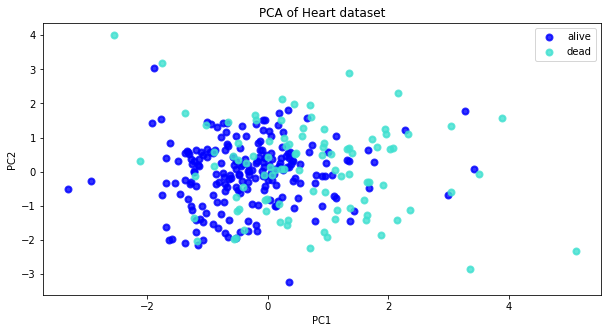

In [14]:
# Scatter plotting the two classes of Alive/Dead on the PC1 and PC2
plt.figure(figsize=(10,5))
colors = ['blue', 'turquoise']
target_names = ['alive', 'dead']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced_T[Y == i, 0], X_reduced_T[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Heart dataset');